In [1]:
# loading important libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
#import pickle
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
import os
import timeit
#import pickle

 
# Loading the data
list = pd.read_csv('BostonHousing.csv')
print(list.shape)
print(list.describe())
print(list.columns)

list.head()

(506, 14)
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
# clean up fields
list_a = list.copy()

# clear nulls
pd.set_option('use_inf_as_na', True)

list_a = list_a.loc[~list_a['crim'].isnull()] 
list_a = list_a.loc[~list_a['zn'].isnull()] 
list_a = list_a.loc[~list_a['indus'].isnull()] 
list_a = list_a.loc[~list_a['chas'].isnull()]
list_a = list_a.loc[~list_a['nox'].isnull()]
list_a = list_a.loc[~list_a['rm'].isnull()]
list_a = list_a.loc[~list_a['age'].isnull()]
list_a = list_a.loc[~list_a['dis'].isnull()]
list_a = list_a.loc[~list_a['rad'].isnull()]
list_a = list_a.loc[~list_a['tax'].isnull()]
list_a = list_a.loc[~list_a['ptratio'].isnull()]
list_a = list_a.loc[~list_a['b'].isnull()]
list_a = list_a.loc[~list_a['lstat'].isnull()]
list_a = list_a.loc[~list_a['medv'].isnull()]

In [3]:
# drop any nulls
print(list_a.shape)
list_a = list_a.dropna()
print(list_a.shape)

(506, 14)
(506, 14)


<AxesSubplot:>

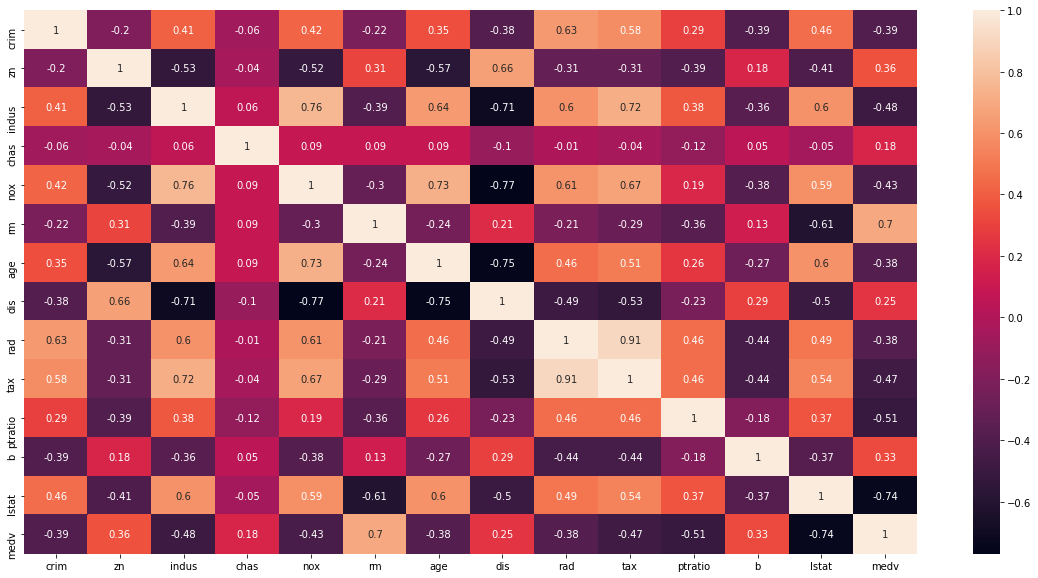

In [4]:
correlation_matrix = list_a.corr().round(2)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

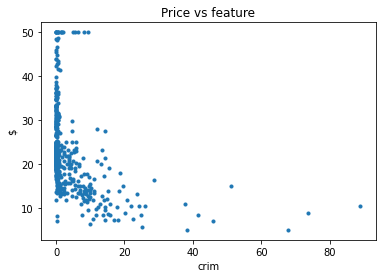

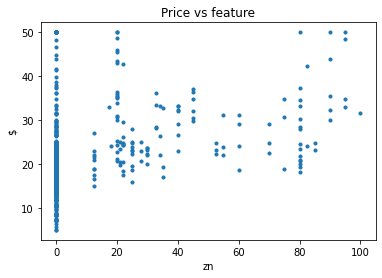

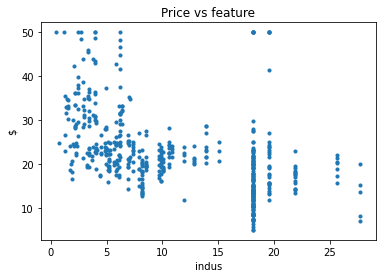

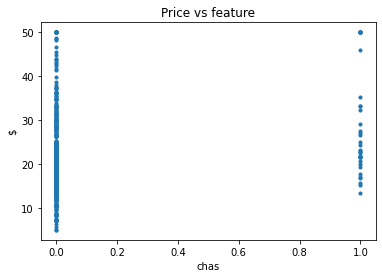

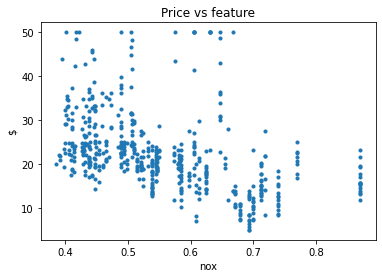

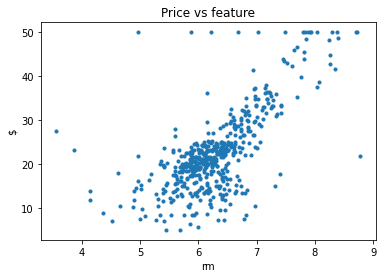

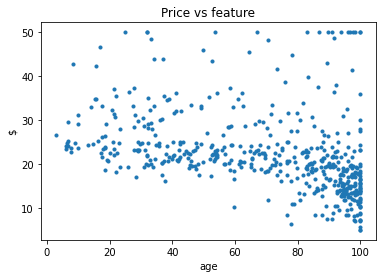

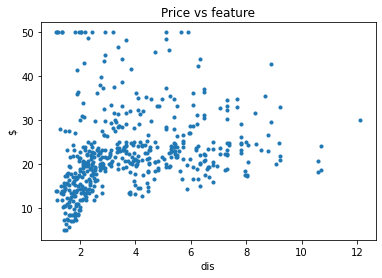

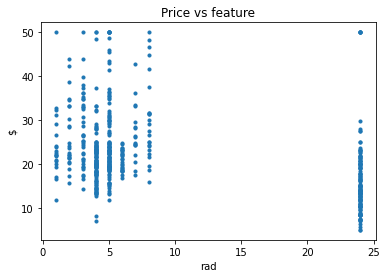

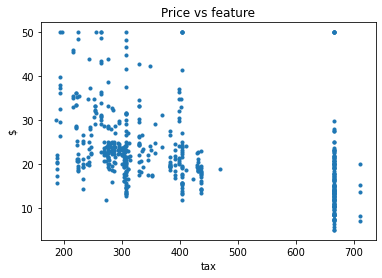

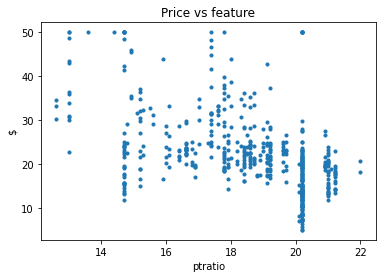

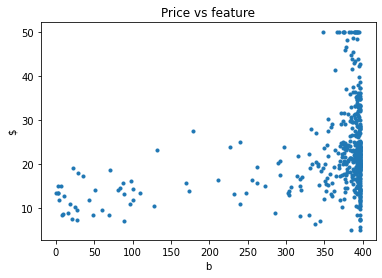

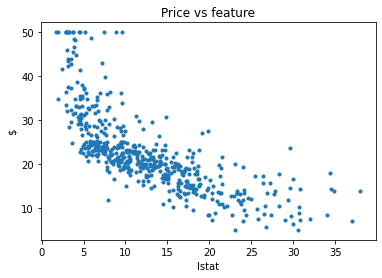

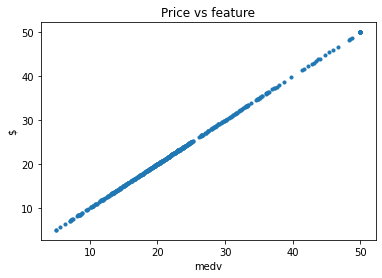

In [5]:
# full dataset
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv']
fig, ax = plt.subplots()
ax.scatter(list_a['crim'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('crim')
ax.set_ylabel('$')

fig, ax = plt.subplots()
ax.scatter(list_a['zn'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('zn')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['indus'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('indus')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['chas'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('chas')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['nox'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('nox')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['rm'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('rm')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['age'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('age')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['dis'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('dis')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['rad'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('rad')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['tax'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('tax')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['ptratio'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('ptratio')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['b'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('b')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['lstat'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('lstat')
ax.set_ylabel('$')
plt.show()

fig, ax = plt.subplots()
ax.scatter(list_a['medv'], list_a['medv'],s=np.pi*3)
ax.set_title('Price vs feature')
ax.set_xlabel('medv')
ax.set_ylabel('$')
plt.show()


In [6]:
assert(len(list_a.loc[list_a['medv'].isnull()]) == 0)

In [7]:
train, test = train_test_split(list_a, random_state = 1)
train_Y, test_Y = train['medv'], test['medv']

list_a = list_a.drop(['medv'], axis = 1)
columnSets = list_a.columns

train_X = train[columnSets]
test_X = test[columnSets]

regr = LinearRegression()
regr.fit(train_X, train_Y)               # training
y_pred = regr.predict(test_X)            # inference
regr_score = r2_score(test_Y, y_pred)
print(regr_score)

refr = RandomForestRegressor(max_depth = 50, random_state = 12, n_estimators = 100)
refr.fit(train_X, train_Y)
refr_score= refr.score(test_X, test_Y)
print(refr_score)
#pickle.dump(refr, open('housing_model.pkl','wb'))

0.7789410172622887
0.9122601710336015


In [8]:
os.makedirs('outputs', exist_ok=True)

# note file saved in the outputs folder is automatically uploaded into experiment record
#joblib.dump(value=regr, filename='outputs/sklearn_housing_regr_model.pkl')
#joblib.dump(value=refr, filename='outputs/sklearn_housing_randomforest_model.pkl')
joblib.dump(refr, 'regression.joblib')
joblib.dump(regr, 'linear_regression.joblib')

['regression.joblib']

In [9]:
#%timeit joblib.load('outputs/sklearn_housing_regr_model.pkl')
#%timeit joblib.load('outputs/sklearn_housing_randomforest_model.pkl')
print('done')

done
